# Takagi-Sugeno-Kang Inference with HotFIS

> This notebook demonstrates a use case where a fuzzy inference system (FIS) is created using HotFIS to address the tipping example often used to illustrate fuzzy logic. Zeroth order Takagi-Sugeno-Kang inference is employed with rules having multiple antecedents.

---

## Table of Contents

* [Setup](#c0)
* [FIS Creation](#c1)

---

## Setup  <a name="c0"></a>

In [2]:
cd ..

C:\Users\eric\Documents\DIGIPEN\hotfis


In [3]:
import hotfis as hf

import numpy as np
import matplotlib.pyplot as plt

from itertools import product

In [15]:
path = "notebooks/img/approx/"

---

## FIS Creation  <a name="c1"></a>

##### Create Membership Function Groupset

In [16]:
# Define membership function groupset
groupset = hf.FuzzyGroupset([
    # Input group 1
    hf.FuzzyGroup("service", 0, 10, [
        hf.FuzzyFunc("poor", [3, 5], "leftedge"),
        hf.FuzzyFunc("good", [3, 5, 7], "triangular"),
        hf.FuzzyFunc("excellent", [5, 7], "rightedge")
    ]),

    # Input group 2
    hf.FuzzyGroup("food", 0, 10, [
        hf.FuzzyFunc("rancid", [4, 6], "leftedge"),
        hf.FuzzyFunc("delicious", [4, 6], "rightedge")
    ]),

    # Output group with zeroth order TSK outputs as parameters
    hf.FuzzyGroup("tip", 0, 30, [
        hf.FuzzyFunc("cheap", [7], "tsk"),
        hf.FuzzyFunc("average", [17], "tsk"),
        hf.FuzzyFunc("generous", [26], "tsk")
    ]),
])

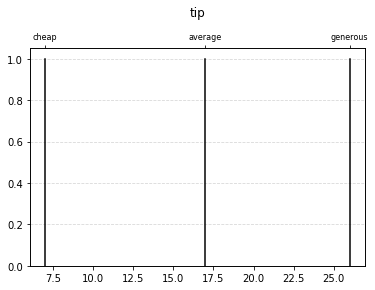

In [22]:
# A group may be plotted with the 'plot' method
groupset["tip"].plot()
plt.savefig(path + "tsk_group.png", bbox_inches="tight", facecolor="white")
plt.show()

##### Create Fuzzy Ruleset

> The other element of a FIS is the ruleset. FuzzyRulesets may be defined with strings representing the rules. The groups and function names of the groupset must be used. Multiple antecedents connected with 'and' and 'or' are supported.

In [23]:
ruleset = hf.FuzzyRuleset([
    "if service is poor or food is rancid then tip is cheap",
    "if service is good then tip is average",
    "if service is excellent or food is delicious then tip is generous",
])

##### Creating the FIS

In [24]:
# Create the fuzzy inference system
fis = hf.FIS(groupset, ruleset)

---

## Approximation of Mamdani

In [25]:
approx_fis = fis.approximate_mamdani()

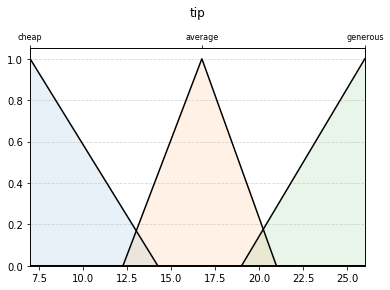

In [26]:
approx_fis.groupset["tip"].plot()
plt.savefig(path + "mam_group.png", bbox_inches="tight", facecolor="white")
plt.show()

## Results Comparison

In [27]:
%%time

num_points = 201

# Save input values
foods = np.linspace(0, 10, num_points)
services = foods.copy()

# Get all combinations of inputs
combos = np.array(list(product(foods, services)))
inputs = {"food": combos[:, 0], "service": combos[:, 1]}

# Calc tsk outputs
tips_tsk = fis.eval_tsk(inputs)["tip"].reshape(num_points, num_points)

# Calc mamdani outputs
tips_mam = approx_fis.eval_mamdani(inputs)["tip"]
tips_mam = approx_fis.defuzz_mamdani(tips_mam)
tips_mam = tips_mam.reshape(num_points, num_points)

# Convert inputs to grids for 3D visualization
foods, services = np.meshgrid(foods, services)

Wall time: 625 ms


<ipython-input-28-fd4726a6d78d>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


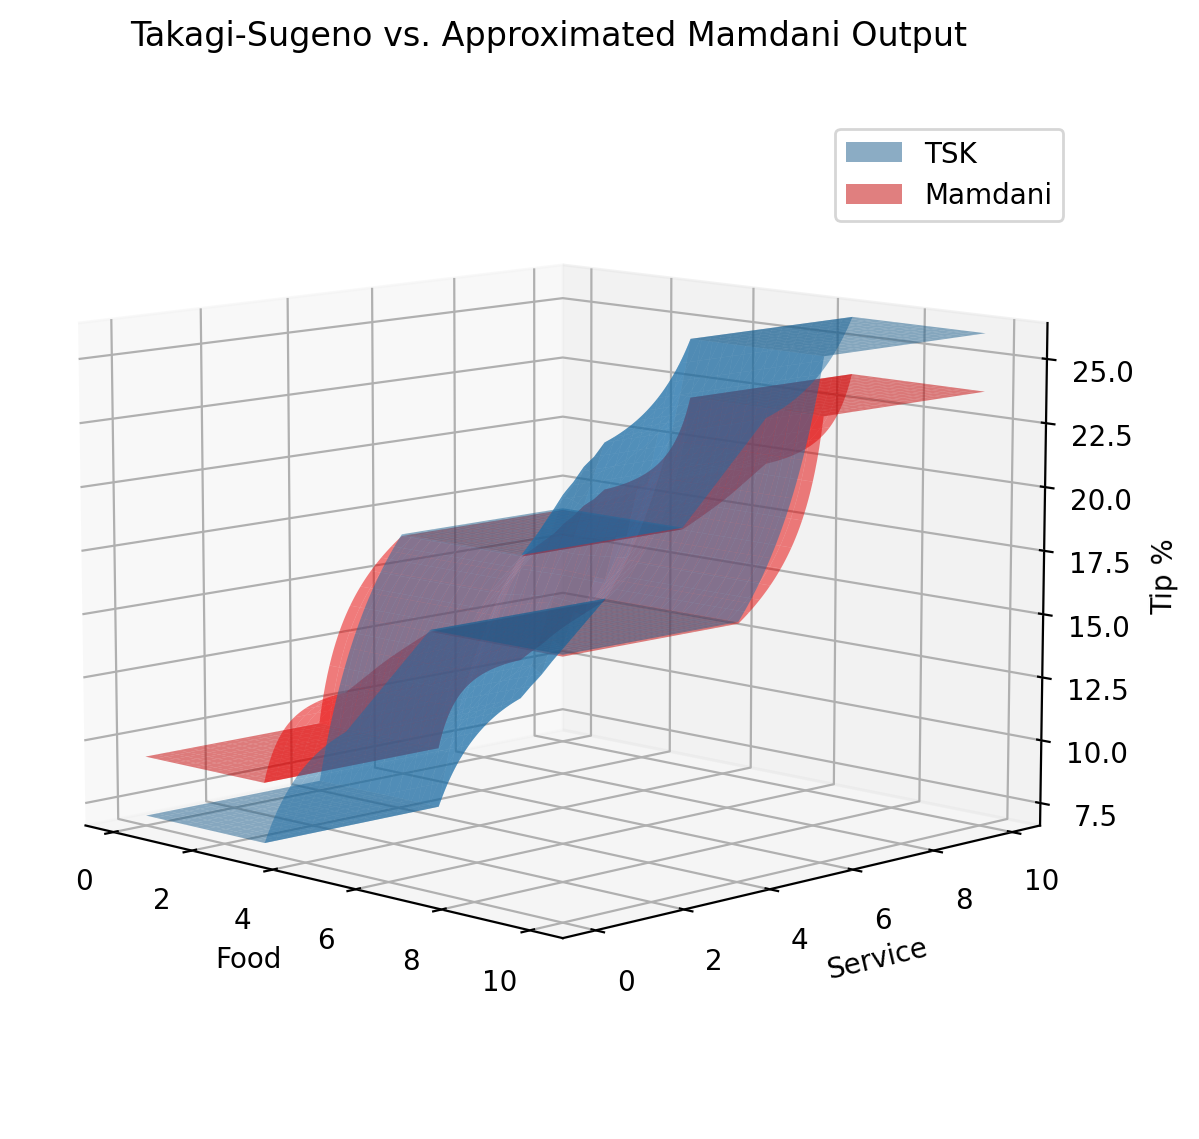

In [28]:
fig = plt.figure(figsize=(7, 7), dpi=200)
ax = fig.gca(projection='3d')

p1 = ax.plot_surface(foods, services, tips_tsk, alpha=0.5, label="TSK")
p2 = ax.plot_surface(foods, services, tips_mam, alpha=0.5, label="Mamdani", color="red")

#ax.set_zlim(0, 30)

ax.view_init(elev=10, azim=-45)

ax.set_xlabel("Food")
ax.set_ylabel("Service")
ax.set_zlabel("Tip %")

ax.set_title("Takagi-Sugeno vs. Approximated Mamdani Output")

p1._facecolors2d = p1._facecolor3d
p1._edgecolors2d = p1._edgecolor3d
p2._facecolors2d = p2._facecolor3d
p2._edgecolors2d = p2._edgecolor3d
ax.legend(loc="best", bbox_to_anchor=(1, 0.95))

plt.savefig(path + "fn_approx.png", bbox_inches="tight", facecolor="white")

plt.show()